Exercise

In this exercise we will run through an example of correcting for multiple comparisons with both the Benjamini-Hochberg procedure and the more conservative Bonferroni correction.

First, simulate multiple (say, 1000) t-tests comparing two samples with equal means and standard deviations, and save the p-values. Obviously, at p<0.05 we expect that ~5% of the simulations to yield a "statistically significant" result (of rejecting the NULL hypothesis that the samples come from distributions with equal means).

Second, once you have the simulated p-values, apply both methods to address the multiple comparisons problem.

Third, set the sample 1 and sample 2 means to be 1 and 2 respectively, and re-run the exercise. What do you notice? What if you make the difference between means even greater?

Simulated 1000 t-tests (n=10 per group) with means 0 vs 0.
Raw proportion with p<0.05: 0.060 (60 tests)
Bonferroni threshold: 0.000050 -> 0 tests significant
BH threshold: 0.000000 -> 0 tests significant (FDR 0.05)


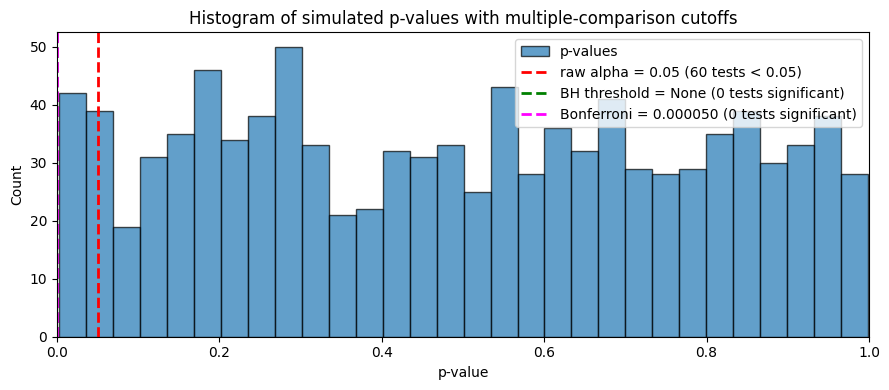

In [ ]:
# Simulate 1000 two-sample t-tests 
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

rng = np.random.default_rng(42) # For reproducibility
num_tests = 1000
sample_size = 10
mu1 = 0
mu2 = 0
sigma = 1.0

p_values = np.empty(num_tests)
for i in range(num_tests):
    x = rng.normal(loc=mu1, scale=sigma, size=sample_size)
    y = rng.normal(loc=mu2, scale=sigma, size=sample_size)
    stat, p = stats.ttest_ind(x, y, equal_var=True)
    p_values[i] = p

# Print raw summary
count_below = (p_values < 0.05).sum()
prop_below = (p_values < 0.05).mean()
print(f"Simulated {num_tests} t-tests (n={sample_size} per group) with means {mu1} vs {mu2}.")
print(f"Raw proportion with p<0.05: {prop_below:.3f} ({count_below} tests)")

# --- Multiple comparisons corrections ---
alpha = 0.05
# Bonferroni threshold
bonf_threshold = alpha / num_tests
# Count significant after Bonferroni
count_bonf = (p_values < bonf_threshold).sum()

# Benjamini-Hochberg procedure (control FDR at alpha)
# Sort p-values and compute BH critical values: (i/m)*alpha for i=1..m
sorted_idx = np.argsort(p_values)
sorted_p = p_values[sorted_idx]
bh_critical = (np.arange(1, num_tests+1) / num_tests) * alpha
# Find the largest p where p <= critical
below = sorted_p <= bh_critical
if below.any():
    max_idx = np.where(below)[0].max()
    bh_threshold = sorted_p[max_idx]
else:
    bh_threshold = 0.0
count_bh = (p_values <= bh_threshold).sum()

print(f"Bonferroni threshold: {bonf_threshold:.6f} -> {count_bonf} tests significant")
print(f"BH threshold: {bh_threshold:.6f} -> {count_bh} tests significant (FDR {alpha})")

# Plot histogram of p-values with vertical lines for raw alpha, BH, and Bonferroni
fig, ax = plt.subplots(figsize=(9,4))
ax.hist(p_values, bins=30, color='C0', edgecolor='black', alpha=0.7, label='p-values')
# raw alpha
ax.axvline(alpha, color='red', linestyle='--', linewidth=2, label=f'raw alpha = {alpha} ({count_below} tests < 0.05)')
# BH threshold (dashed green)
if bh_threshold > 0:
    ax.axvline(bh_threshold, color='green', linestyle='--', linewidth=2, label=f'BH threshold = {bh_threshold:.4f} ({count_bh} tests significant)')
else:
    # plot at 0 (will be off-scale) but include label
    ax.axvline(0, color='green', linestyle='--', linewidth=2, label=f'BH threshold = None ({count_bh} tests significant)')
# Bonferroni threshold (dashed magenta)
ax.axvline(bonf_threshold, color='magenta', linestyle='--', linewidth=2, label=f'Bonferroni = {bonf_threshold:.6f} ({count_bonf} tests significant)')

ax.set_xlabel('p-value')
ax.set_ylabel('Count')
ax.set_title('Histogram of simulated p-values with multiple-comparison cutoffs')
ax.set_xlim(0,1)
ax.legend(loc='upper right')
plt.tight_layout()
plt.show()


When each sample has equal means and standard deviations, 60 tests are p<0.05 (mu1=0, mu2=0, sigma=1).
- BH threshold: 0.000000 -> 0 tests significant (FDR 0.05)
- Bonferroni threshold: 0.000050 -> 0 tests significant

When samples have different means and equal standard deviations (mu=1, mu=2, sigma=1), 566 tests are p<0.05. 
- BH threshold: 0.019925 -> 401 tests significant (FDR 0.05)
- Bonferroni threshold: 0.000050 -> 15 tests significant

